In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv(r"D:\Desktop\Fall\DATA1030\project1\auto+mpg\auto_mpg_with_brands.csv")
data1 = data1.loc[:, data1.columns != 'model year']
data1 = data1.loc[:, data1.columns != 'car name']
data1 = data1.replace('toyouta', 'toyota')
data1 = data1.replace('vokswagen', 'volkswagen')
data1 = data1.replace('mercedes-benz', 'mercedes')
data1 = data1.replace('chevroelt', 'chevrolet')
data1 = data1.replace('capri', 'mercury')
data_brand = data1.replace('maxda', 'mazda')
data = data1.loc[:, data1.columns != 'brand']

data = data[data['mpg'].notna()]

data

mpg  cylinders  displacement  horsepower  weight  acceleration  origin
0    18.0        8.0         307.0       130.0  3504.0          12.0     1.0
1    15.0        8.0         350.0       165.0  3693.0          11.5     1.0
2    18.0        8.0         318.0       150.0  3436.0          11.0     1.0
3    16.0        8.0         304.0       150.0  3433.0          12.0     1.0
4    17.0        8.0         302.0       140.0  3449.0          10.5     1.0
..    ...        ...           ...         ...     ...           ...     ...
401  27.0        4.0         140.0        86.0  2790.0          15.6     1.0
402  44.0        4.0          97.0        52.0  2130.0          24.6     2.0
403  32.0        4.0         135.0        84.0  2295.0          11.6     1.0
404  28.0        4.0         120.0        79.0  2625.0          18.6     1.0
405  31.0        4.0         119.0        82.0  2720.0          19.4     1.0

[398 rows x 7 columns]

In [4]:
# data1 = pd.read_csv(r"D:\Desktop\Fall\DATA1030\project\auto+mpg\auto_mpg_with_brands.csv", header = None, sep = '\t')
# data1[['8', '9']] = data1[7].str.split('.\t', expand=True)
# data1 = data1.loc[:, data1.columns != 7]
# data1.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
# data1 = data1.loc[:, data1.columns != 'model_year']
# data1 = data1.loc[:, data1.columns != 'car_name']
data_head = data.head()
print("data head:")
print(data_head)

print()
print("data info:")
data.info()


pd.value_counts(data1['cylinders'])

X = data.loc[:, data.columns != 'mpg']

y = data['mpg']




data head:
    mpg  cylinders  displacement  horsepower  weight  acceleration  origin
0  18.0        8.0         307.0       130.0  3504.0          12.0     1.0
1  15.0        8.0         350.0       165.0  3693.0          11.5     1.0
2  18.0        8.0         318.0       150.0  3436.0          11.0     1.0
3  16.0        8.0         304.0       150.0  3433.0          12.0     1.0
4  17.0        8.0         302.0       140.0  3449.0          10.5     1.0

data info:
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    float64
dtypes: float64(7)
memory usage: 24.9 KB


**EDA Part:**

In [5]:
#Check each features
for name in data.columns:
    print(name, ": ")
    print(data[name].describe())
    print()

mpg : 
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

cylinders : 
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

displacement : 
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

horsepower : 
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

weight : 
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Na

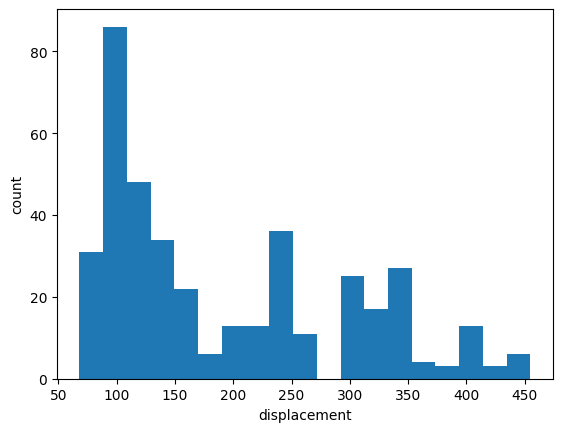

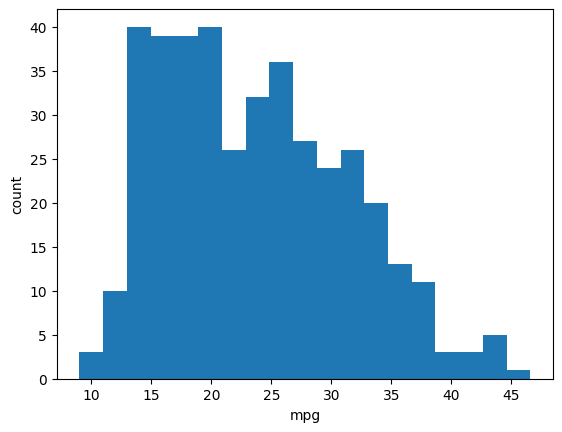

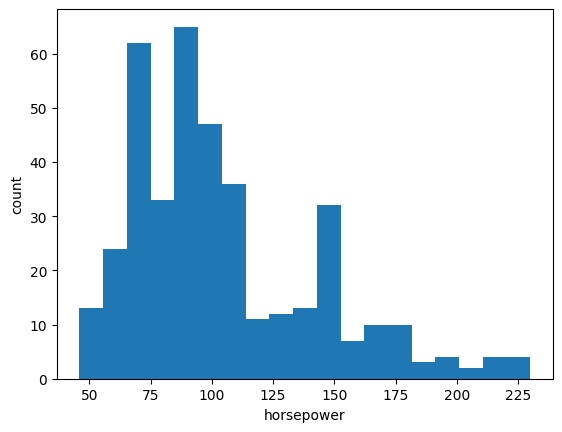

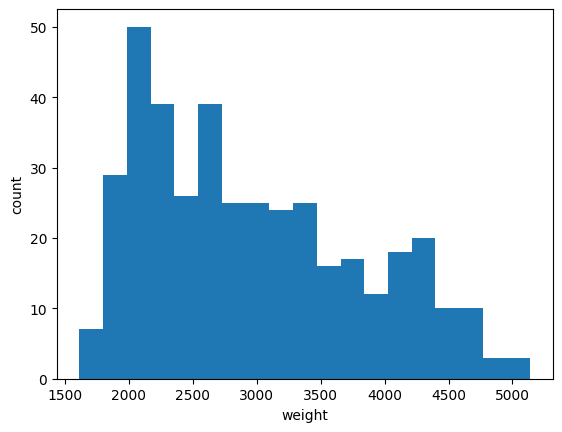

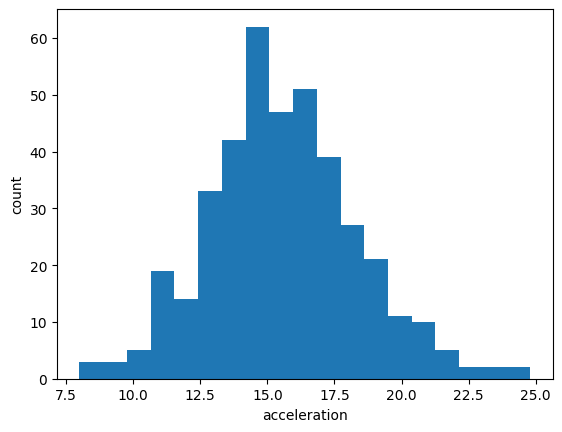

cylinders : 
cylinders
4.0    204
8.0    103
6.0     84
3.0      4
5.0      3
Name: count, dtype: int64

origin : 
origin
1.0    249
3.0     79
2.0     70
Name: count, dtype: int64



In [6]:

for name in ['displacement', 'mpg', 'horsepower', 'weight', 'acceleration']:
    data[name].plot.hist(bins =int(np.sqrt(data.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
    plt.xlabel(name)
    plt.ylabel('count')
    plt.show()



for name in ['cylinders', 'origin']:
    print(name, ": ")
    print(pd.value_counts(data[name]))
    print()

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
origin        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              acceleration    origin  
mpg               0.420289  0.563450  
cylinders        -0.505419 -0.562543  
displacement     -0.543684 -0.609409  
horsepower       -0.689196 -0.455171  
weight           -0.417457 -0.581024  
acceleration      1.000000  0.205873  
origin            0.205873  1.000000  


Text(0.5, 1.0, 'Features Correlating with MPG')

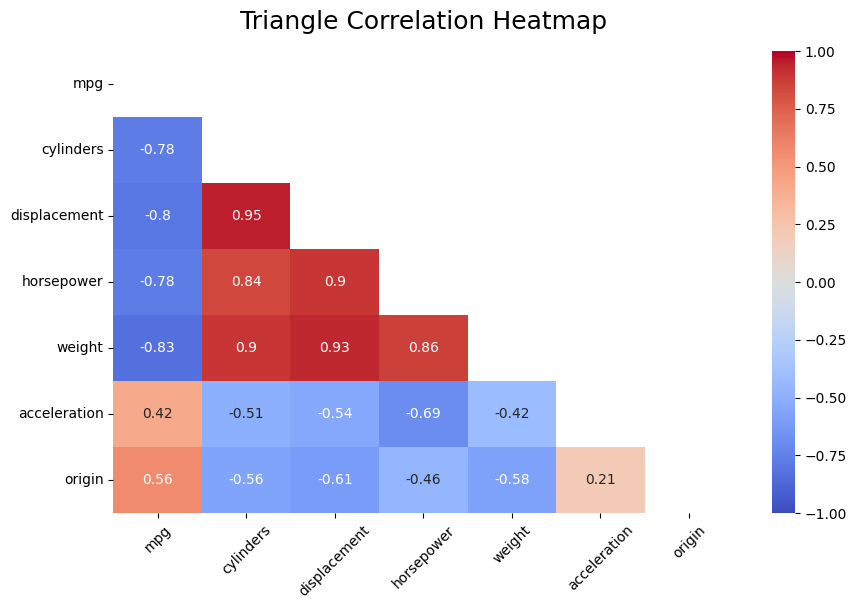

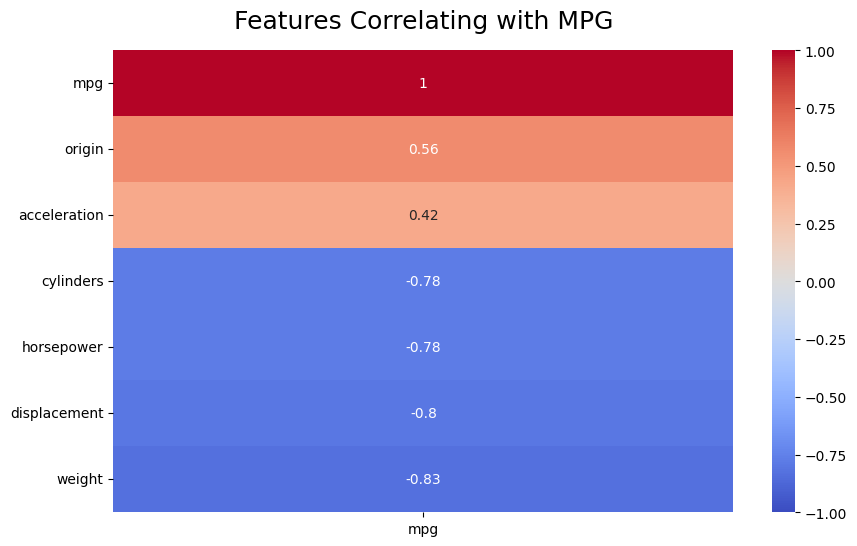

In [7]:
data_num = data.loc[:, data.columns != 'brand']
print(data_num.corr())
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num.corr()))
heatmap = sns.heatmap(data_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')#cmap='BrBG'
plt.xticks(rotation=45)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)


plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data_num.corr()[['mpg']].sort_values(by='mpg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16)

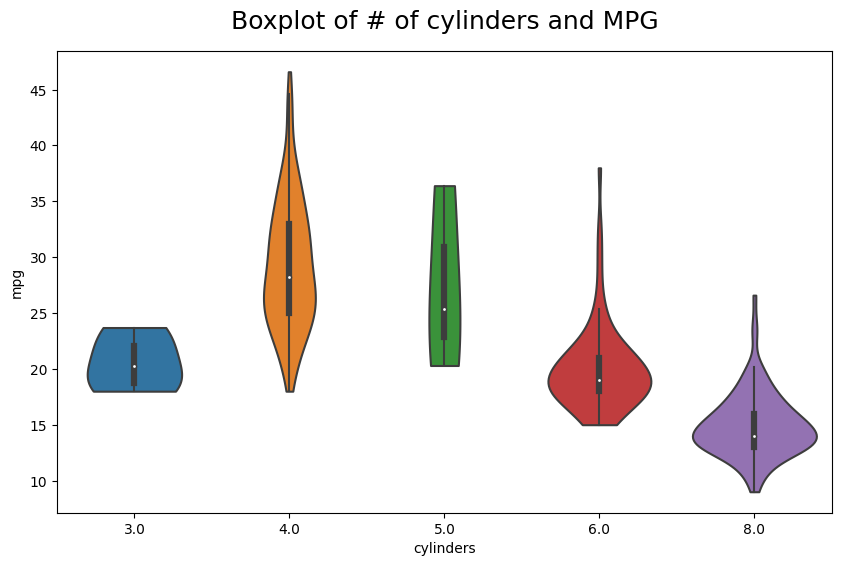

In [8]:
# dataset = [data1[data1['cylinders']== 3.0]['mpg'].values,
#            data1[data1['cylinders']== 4.0]['mpg'].values,
#            data1[data1['cylinders']== 5.0]['mpg'].values,
#            data1[data1['cylinders']== 6.0]['mpg'].values,
#            data1[data1['cylinders']== 8.0]['mpg'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmedians = True, showextrema = True)
# plt.xticks([1, 2, 3, 4, 5],['3','4', '5', '6', '8'])
# plt.title('Violin plot of cylinders vs. mpg')
# plt.xlabel('# of cylinders')
# plt.ylabel('mpg')
# plt.show()
# data1['cylinders']
plt.figure(figsize=(10,6))
graph = sns.violinplot(data = data, x = data['cylinders'], y = data['mpg'], 
                       cut = 0).set_title('Boxplot of # of cylinders and MPG', fontdict={'fontsize':18}, pad=16)

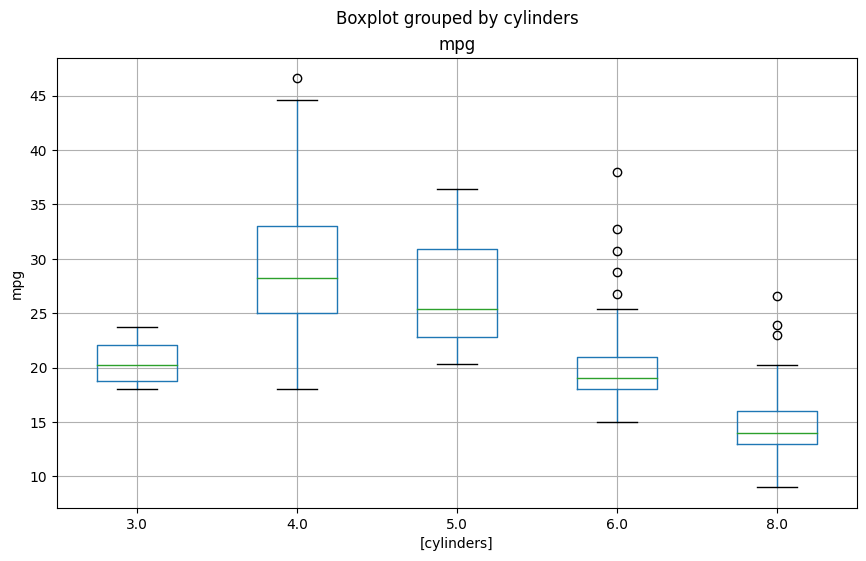

In [9]:
data[['mpg','cylinders']].boxplot(by='cylinders',figsize=(10, 6))
plt.ylabel('mpg')
plt.show()

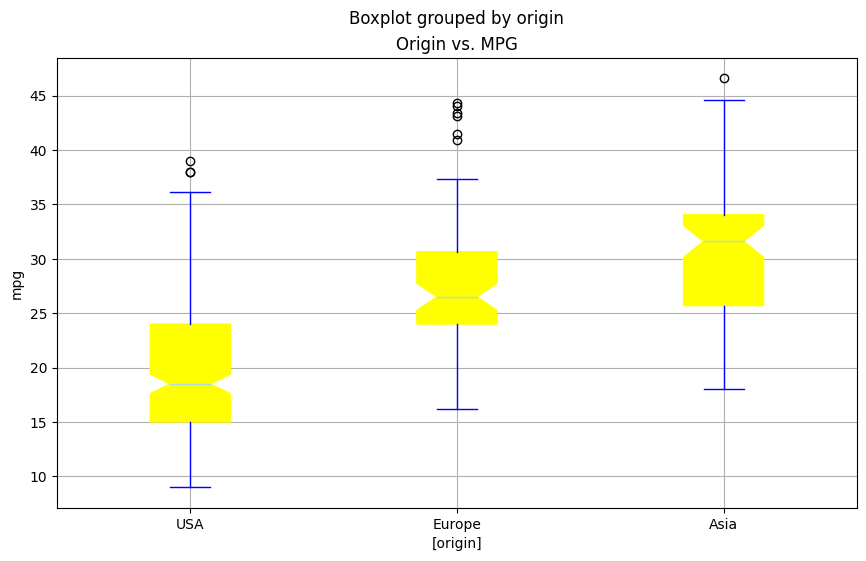

In [10]:
c = 'yellow'
data[['mpg','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                               boxprops=dict(facecolor='yellow', color='yellow'),
                               medianprops=dict(color='lightblue'),
                               whiskerprops=dict(color='blue'),
                               capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. MPG')
plt.ylabel('mpg')
plt.show()

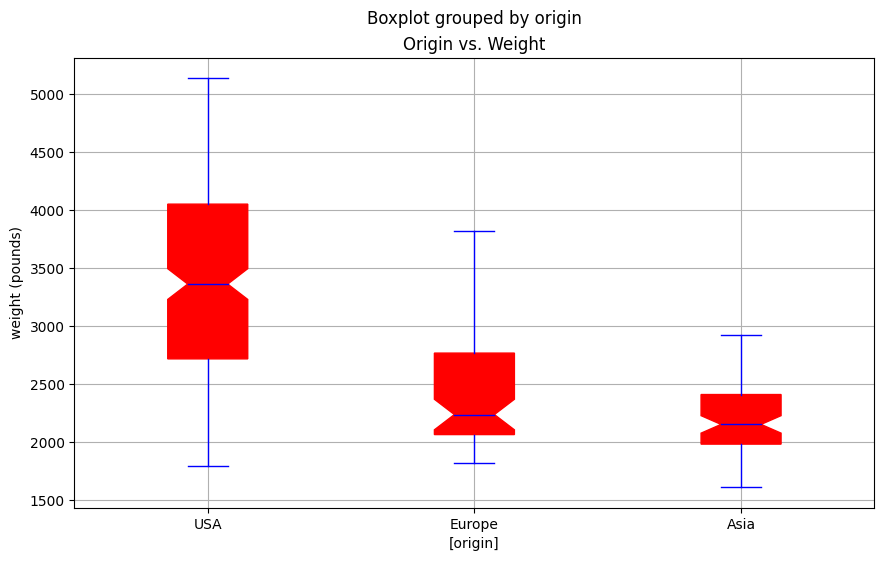

In [11]:
box = data[['weight','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                                         boxprops=dict(facecolor='red', color='red'),
                                        medianprops=dict(color='blue'),
                                        whiskerprops=dict(color='blue'),
                                        capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. Weight')
plt.ylabel('weight (pounds)')
plt.show()

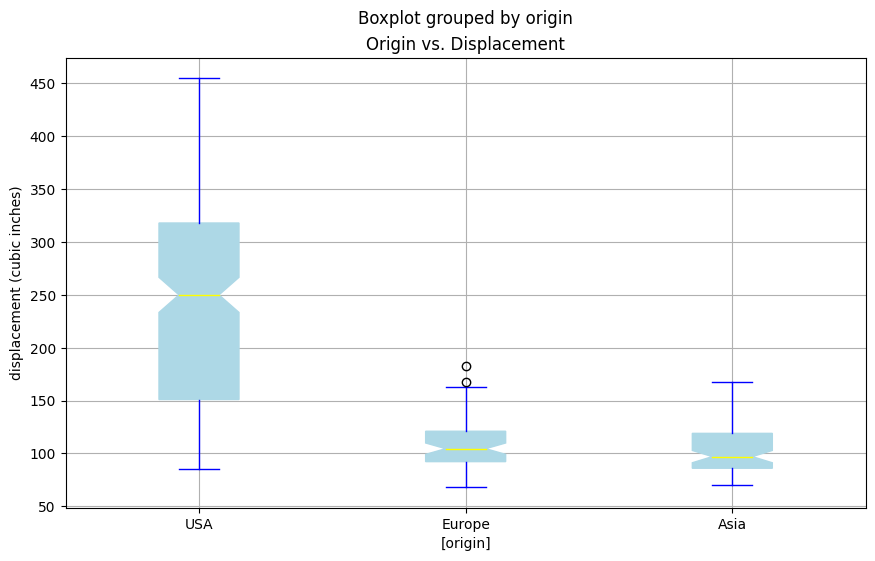

In [12]:
data[['displacement','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                                         boxprops=dict(facecolor='lightblue', color='lightblue'),
                                        medianprops=dict(color='yellow'),
                                        whiskerprops=dict(color='blue'),
                                        capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. Displacement')
plt.ylabel('displacement (cubic inches)')
plt.show()

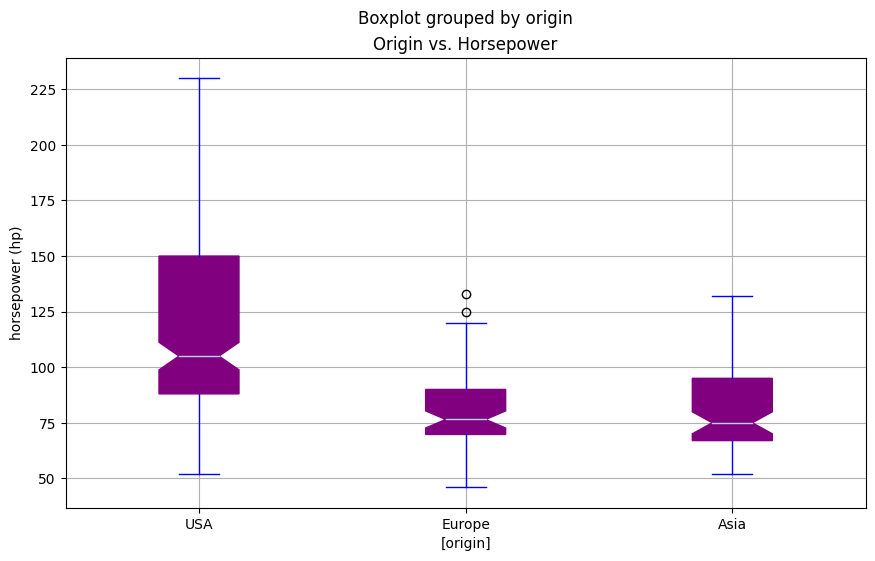

In [13]:
data[['horsepower','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                                         boxprops=dict(facecolor='purple', color='purple'),
                                        medianprops=dict(color='lightblue'),
                                        whiskerprops=dict(color='blue'),
                                        capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. Horsepower')
plt.ylabel('horsepower (hp)')
plt.show()

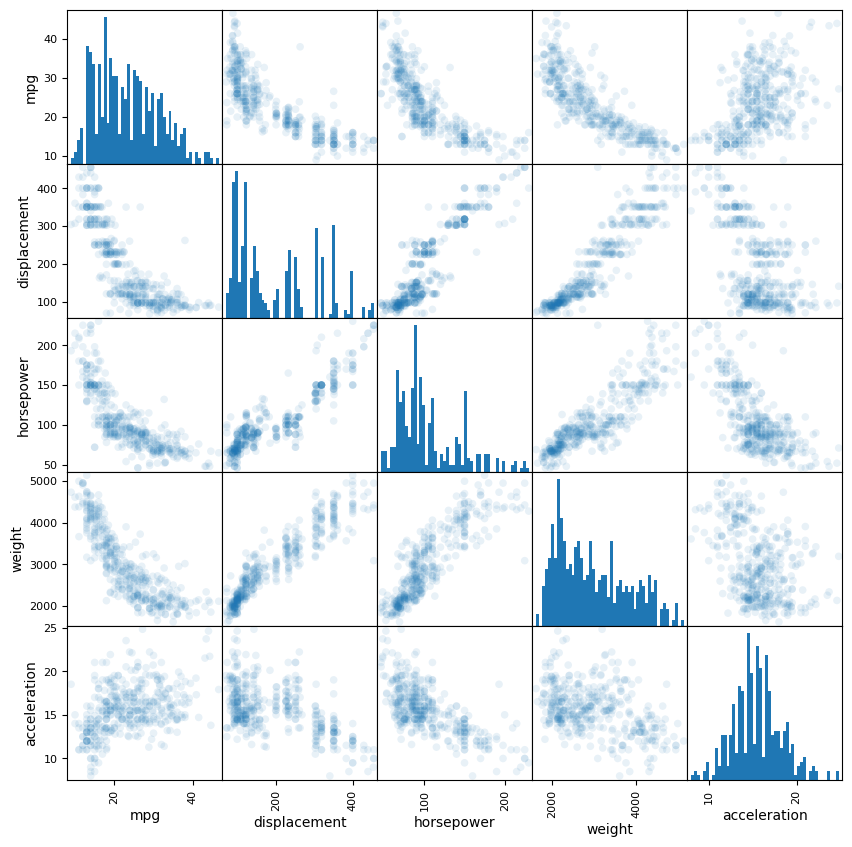

In [14]:
data_scatter = data[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
pd.plotting.scatter_matrix(data_scatter, figsize=(10, 10), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [15]:
#baseline
from sklearn.metrics import mean_squared_error
y_mean = [np.mean(y)]*len(y)
baseline = np.sqrt(mean_squared_error(y, y_mean))
print('The baseline for this dataset is: ', baseline)

The baseline for this dataset is:  7.806159061274433


In [16]:
#do onehot encoder for X for further impute
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


cat_ftrs = ['origin']
ordinal_ftrs = ['cylinders']
ordinal_cats = ['3.0', '4.0', '5.0', '6.0', '8.0']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = [ordinal_cats]))])
num_ftrs = ['displacement', 'horsepower', 'weight', 'acceleration']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('num', numeric_transformer, num_ftrs)],
remainder='passthrough')


In [17]:
#since iid, we do imputer for the whole dataset
X.info()
X_preimpute = preprocessor_cat.fit_transform(X)
    # the feature names after fit
feature_names = preprocessor_cat.get_feature_names_out()
X_preimpute_frame_cat= pd.DataFrame(data=X_preimpute,columns=feature_names)
X_reind = X
#initialize index for further concatenate
X_reind.reset_index(drop=True, inplace=True)
X_preimpute_frame_cat.reset_index(drop=True, inplace=True)
#concatenate
X_preimpute_frame = pd.concat([X, X_preimpute_frame_cat], axis=1)
X_preimpute_frame.info()
# Drop the original categorical columns
X_preimpute_frame = X_preimpute_frame.drop(cat_ftrs, axis=1)
X_preimpute_frame = X_preimpute_frame.drop(ordinal_ftrs, axis=1)
X_preimpute_frame = X_preimpute_frame.drop(num_ftrs, axis=1)

#do imputer for the X_preimpute_frame
imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(X_preimpute_frame)
X_imp = pd.DataFrame(data=X_impute, columns = X_preimpute_frame.columns)
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   origin        398 non-null    float64
dtypes: float64(6)
memory usage: 21.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cylinders          398 non-null    float64
 1   displacement       398 non-null    float64
 2   horsepower         392 non-null    float64
 3   weight             398 non-null    float64
 4   acceleration       398 non-null    float64
 5   origin             398 non-null    float64
 6   cat__origin_1.0    398

In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
# read in the dataset as a dataframe




# function for the ML pipeline as outlined above 
def MLpipe_KFold_RMSE(X, y, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []
    y_tests = []
    X_tests = []


    # your code here...
    for i in range(0,10):
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        y_tests.append(y_test)
        X_tests.append(X_test)
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
        pipe = Pipeline(steps=[('ML_algo', ML_algo)])
        grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
        grid.fit(X_other, y_other)
        best_model = grid.best_estimator_
        best_models.append(best_model)
        # Calculate the model's error on the test set
        y_pred = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_scores.append(test_rmse)
    file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'wb')
    pickle.dump((X_tests),file)
    file.close()
    
    file = open(r"C:\Users\Ruize Ma\1030_project_files\y_tests.txt", 'wb')
    pickle.dump((y_tests),file)
    file.close()

    np.random.seed(10)
    return test_scores, best_models


In [22]:
# #Define numerical preprocessor
# num_ftrs = ['displacement', 'horsepower', 'weight', 'acceleration']

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])
# preprocessor_num = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, num_ftrs)],
# remainder='passthrough')

In [56]:
from sklearn.linear_model import Lasso
model_name = []
mean_scores = []
std_scores = []
min_scores = []

# ML Algorithm: Linear Regression with L1 regularization (Lasso)
ML_algo = Lasso()

# Parameter grid for hyperparameter tuning
param_grid = {
    'ML_algo__alpha': [ 0.001, 0.01, 0.1, 1, 10, 100]}

# Test the function
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, ML_algo, param_grid)
scores = []
best_models_lasso = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\lasso_models.txt", 'wb')
# pickle.dump((best_models_lasso),file)
# file.close()
model_name.append('Lasso')
Lasso_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [57]:
from sklearn.linear_model import Ridge



lin_reg = Ridge()
param_grid = {
    'ML_algo__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, lin_reg, param_grid)
best_models_ridge = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\ridge_models.txt", 'wb')
# pickle.dump((best_models_ridge),file)
# file.close()
model_name.append('Ridge')
Ridge_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [58]:
#linear regression with an elastic net
from sklearn.linear_model import ElasticNet
model = ElasticNet()
alphas = np.logspace(5, 7, 6)
param_grid = {
    'ML_algo__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'ML_algo__l1_ratio': np.linspace(0.2, 0.8, 3)
}
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, model, param_grid)
best_models_elastic = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\elastic_models.txt", 'wb')
# pickle.dump((best_models_elastic),file)
# file.close()
model_name.append('elastic net')
Elastic_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [59]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
                'ML_algo__max_depth': [None, 1, 3, 10, 20],
                'ML_algo__max_features': [None, 1,3,10,20]
              }
reg_RF = RandomForestRegressor()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg_RF, param_grid)
# file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'wb')
# pickle.dump((X_tests),file)
# file.close()

# file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'wb')
# pickle.dump((X_tests),file)
# file.close()
best_models_rf = best_models
model_name.append('RF')
RF_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVR
param_grid = {
                'ML_algo__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
                'ML_algo__C': [1e-1, 1e0, 1e1]
}
reg = SVR()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg, param_grid)
best_models_svr = best_models
model_name.append('SVR')
# file = open(r"C:\Users\Ruize Ma\1030_project_files\svr_models.txt", 'wb')
# pickle.dump((best_models_svr),file)
# file.close()
SVR_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
                'ML_algo__n_neighbors': [1, 10, 30, 50, 70, 100],
                'ML_algo__weights': ["uniform", "distance"]
              }
reg = KNeighborsRegressor()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg, param_grid)
best_models_knn = best_models
model_name.append('KNN')
KNN_scores = test_scores
# file = open(r"C:\Users\Ruize Ma\1030_project_files\knn_models.txt", 'wb')
# pickle.dump((best_models_knn),file)
# file.close()
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [32]:
#Define preprocessor for XGB
num_ftrs = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_ftrs = ['origin']
ordinal_ftrs = ['cylinders']
ordinal_cats = ['3.0', '4.0', '5.0', '6.0', '8.0']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = [ordinal_cats]))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Assuming you've defined X, y, and preprocessor earlier

param_grid = {
    'ML_algo__learning_rate': [0.05, 0.1, 0.15],
    'ML_algo__n_estimators': [100, 200, 300],
    'ML_algo__missing': [np.nan],
    'ML_algo__max_depth': [3, 4, 5]
}

random_states = [i for i in range(10)]
test_score_list = []
best_model_list = []
y_test_pred_set = []

for i in random_states:
    # 1. Split the data into training and testing sets
    X_other_xgb, X_test_xgb, y_other_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42*i)
    
    # 2. Preprocess the data
    prep = Pipeline(steps=[('preprocessor', preprocessor), ('ML_algo', XGBRegressor(eval_metric='logloss'))])

    # 3. Train XGBoost classifier and tune hyperparameter by using GridsearchCV
    kf = KFold(n_splits=4, shuffle=True, random_state=42*i)
    
    # Lists to store validation sets for each fold
    eval_sets = []
    
    for train_index, val_index in kf.split(X_other_xgb):
        X_train_fold, X_val_fold = X_other_xgb.iloc[train_index], X_other_xgb.iloc[val_index]
        y_train_fold, y_val_fold = y_other_xgb.iloc[train_index], y_other_xgb.iloc[val_index]
        
        eval_sets.append((X_val_fold, y_val_fold))
    
    grid_search = GridSearchCV(estimator=prep, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf,
                               return_train_score=True, verbose=False)
    
    # Set early stopping rounds and eval sets for each fold
    grid_search.set_params(estimator__ML_algo__ML_algo__early_stopping_rounds=10, estimator__ML_algo__ML_algo__eval_set=eval_sets)
    
    grid_search.fit(X_other_xgb, y_other_xgb)

    # 4. Get the best model
    best_model = grid_search.best_estimator_

    # 5. Save train and test scores
    test_preds = best_model.predict(X_test_xgb)
    y_test_pred_set.append(pd.DataFrame(data=test_preds))

    best_model_list.append(best_model)
    test_score_list.append(np.sqrt(mean_squared_error(y_test_xgb, test_preds)))

# Print results
print("Mean of test RMSE over 10 random states:", np.mean(test_score_list))
print("Standard Deviation of test RMSE over 10 random states:", np.std(test_score_list))


[21:27:25] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:27:25] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:27:25] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:27:25] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:27:25] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:27:26] WARNING: D:\bld\xgboost-split_1693020860727\work\src\learner.cc:767: 
Parameters: { "ML_algo__early_stopping_rounds", "ML_algo__eval_set" } are not used.

[21:

In [34]:
model_name.append('XGBoost')
XGB_scores = test_score_list
mean_scores.append(np.mean( test_score_list))
std_scores.append(np.std( test_score_list))
min_scores.append(np.min( test_score_list))

## RUN FROM HERE

In [17]:
import pickle
# file = open(r"C:\Users\Ruize Ma\1030_project_files\XGB_models.txt", 'wb')
# pickle.dump((best_model_list),file)
# file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\XGB_models.txt", 'rb')
best_model_list = pickle.load(file)
file.close()
best_model_list[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['origin']),
                                                 ('ord',
                                                  Pipe...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None, ...))])

In [18]:
#get all scores
file = open(r"C:\Users\Ruize Ma\1030_project_files\lasso_models.txt", 'rb')
best_models_lasso = pickle.load(file)
file.close()

file = open(r"C:\Users\Ruize Ma\1030_project_files\ridge_models.txt", 'rb')
best_models_ridge = pickle.load(file)
file.close()

file = open(r"C:\Users\Ruize Ma\1030_project_files\elastic_models.txt", 'rb')
best_models_elastic = pickle.load(file)
file.close()

file = open(r"C:\Users\Ruize Ma\1030_project_files\svr_models.txt", 'rb')
best_models_svr = pickle.load(file)
file.close()

file = open(r"C:\Users\Ruize Ma\1030_project_files\knn_models.txt", 'rb')
best_models_knn = pickle.load(file)
file.close()

In [19]:
best_models_lasso[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight',
                                                   'acceleration'])])),
                ('ML_algo', Lasso(alpha=0.01))])

In [20]:
best_models_ridge[0]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight',
                                                   'acceleration'])])),
                ('ML_algo', Ridge(alpha=1))])

In [21]:
best_models_elastic[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight',
                                                   'acceleration'])])),
                ('ML_algo', ElasticNet(alpha=0.01, l1_ratio=0.2))])

In [22]:
best_models_svr[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight',
                                                   'acceleration'])])),
                ('ML_algo', SVR(C=10.0, gamma=0.1))])

In [23]:
best_models_knn[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight',
                                                   'acceleration'])])),
                ('ML_algo',
                 KNeighborsRegressor(n_neighbors=10, weights='distance'))])

In [24]:
#save result

# file = open(r"C:\Users\Ruize Ma\1030_project_files\scores.txt", 'wb')
# pickle.dump((score_result),file)
# file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\scores.txt", 'rb')
score_result = pickle.load(file)
file.close()
model_name = []
for name in score_result:
    model_name.append(name[0])

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_other, X_test, y_other, y_test = train_test_split(X_imp,y,test_size = 0.2,random_state=42*0)
y_mean = [np.mean(y_test)]*len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_mean, y_test))
print("The baseline RMSE is: ", baseline_rmse)

The baseline RMSE is:  7.966013745908301


In [26]:
import pandas as pd
result = pd.DataFrame(score_result, columns=['model_name', 'mean_score', 'std_score', 'min_score'])
result

model_name  mean_score  std_score  min_score
0        Lasso    4.300613   0.392753   3.675606
1        Ridge    4.304255   0.397345   3.687392
2  elastic net    4.305276   0.397187   3.676152
3           RF    3.694201   0.410541   3.045225
4          SVR    3.871264   0.471935   3.272944
5          KNN    3.935725   0.498084   3.331544
6      XGBoost    3.961699   0.486509   2.973162

In [27]:
score_resultbymin = sorted(score_result, key=lambda x: x[3], reverse = False)
print(score_resultbymin)
score_resultbymean = sorted(score_result, key=lambda x: x[1], reverse = False)
print(score_resultbymean)
score_resultbystd = sorted(score_result, key=lambda x: x[2], reverse = False)
print(score_resultbystd)
print(f"The model with least mean RMSE is {score_resultbymean[0][0]}.")
print(f"The model with least min RMSE is {score_resultbymin[0][0]}.")
print(f"The model with least std RMSE is {score_resultbystd[0][0]}.")


[('XGBoost', 3.9616992195031138, 0.486508828251309, 2.9731621459569957), ('RF', 3.6942013176228867, 0.4105407754488729, 3.0452251610917496), ('SVR', 3.8712641751514445, 0.4719354154394289, 3.2729440087021415), ('KNN', 3.9357246452910473, 0.498084449798855, 3.331543673913141), ('Lasso', 4.300613250906469, 0.392753495079748, 3.6756062767901065), ('elastic net', 4.3052757874544465, 0.3971872299423459, 3.6761521676677247), ('Ridge', 4.304254824834778, 0.39734523805123534, 3.687391562270705)]
[('RF', 3.6942013176228867, 0.4105407754488729, 3.0452251610917496), ('SVR', 3.8712641751514445, 0.4719354154394289, 3.2729440087021415), ('KNN', 3.9357246452910473, 0.498084449798855, 3.331543673913141), ('XGBoost', 3.9616992195031138, 0.486508828251309, 2.9731621459569957), ('Lasso', 4.300613250906469, 0.392753495079748, 3.6756062767901065), ('Ridge', 4.304254824834778, 0.39734523805123534, 3.687391562270705), ('elastic net', 4.3052757874544465, 0.3971872299423459, 3.6761521676677247)]
[('Lasso', 4.3

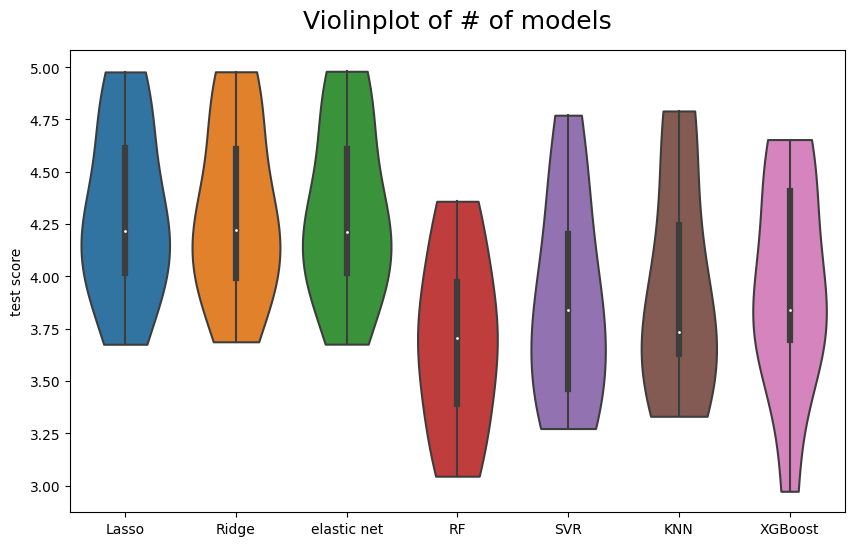

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# all_scores = list(zip(Lasso_scores, Ridge_scores, Elastic_scores, RF_scores, SVR_scores, KNN_scores, XGB_scores))
# file = open(r"C:\Users\Ruize Ma\1030_project_files\all_scores.txt", 'wb')
# pickle.dump((all_scores),file)
# file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\all_scores.txt", 'rb')
all_scores = pickle.load(file)
file.close()
all_scores = pd.DataFrame(all_scores, columns = model_name)
all_scores
plt.figure(figsize=(10,6))
plt.ylabel('test score')
graph = sns.violinplot(data = all_scores, 
                       cut = 0).set_title('Violinplot of # of models', fontdict={'fontsize':18}, pad=16)
plt.savefig('Violinplot.png', dpi=300)


In [30]:
#rerun rf and save result

y_tests = []
X_tests = []
param_grid = {
                'ML_algo__max_depth': [None, 1, 3, 10, 20],
                'ML_algo__max_features': [None, 1,3,10,20]
              }
reg_RF = RandomForestRegressor()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg_RF, param_grid)
best_models_rf = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'wb')
# pickle.dump((X_tests),file)
# file.close()

# file = open(r"C:\Users\Ruize Ma\1030_project_files\y_tests.txt", 'wb')
# pickle.dump((y_tests),file)
# file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\rf_models.txt", 'wb')
pickle.dump((best_models_rf),file)
file.close()

In [39]:
file = open(r"C:\Users\Ruize Ma\1030_project_files\rf_models.txt", 'rb')
best_models_rf = pickle.load(file)
file.close()
best_models_rf[1]
file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'rb')
X_tests = pickle.load(file)
file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\y_tests.txt", 'rb')
y_tests = pickle.load(file)
file.close()

X_test = X_tests[1]
y_test = y_tests[1]

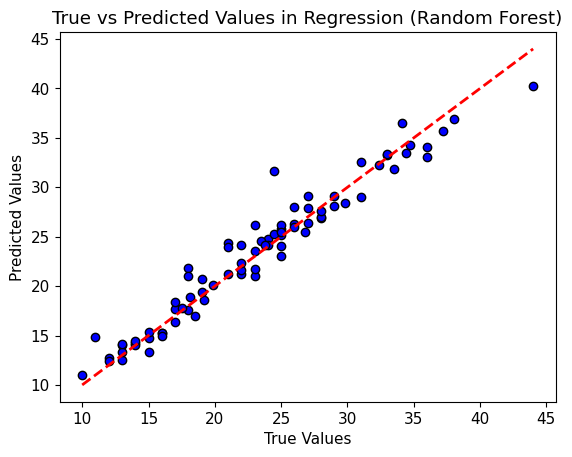

In [40]:
y_pred = best_models_rf[0].predict(X_test)
plt.scatter(y_test, y_pred, color='blue', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values in Regression (Random Forest)')
plt.savefig('True vs. Predicted.png', dpi=300)
plt.show()


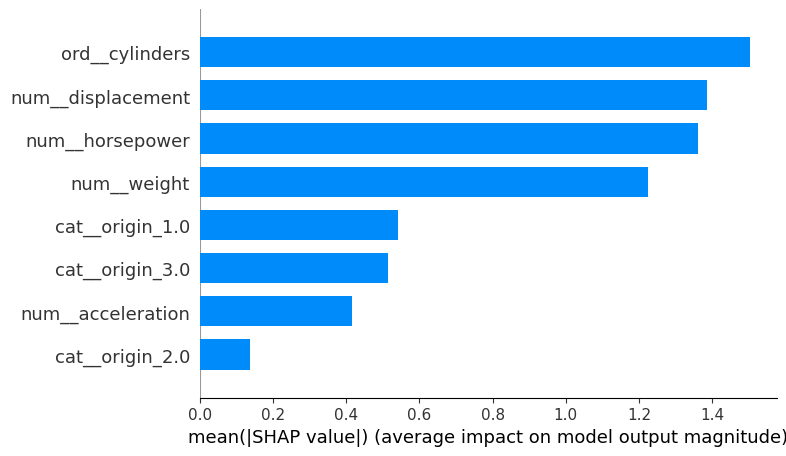

In [41]:
import shap
feature_names = X_imp.columns
model_rf = best_models_rf[0].named_steps['ML_algo']
explainer = shap.Explainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = feature_names, plot_type='bar',show = False)
plt.savefig('summary_plot.png', dpi=350,bbox_inches = 'tight')

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
beseline_r2 = r2_score(y_test,best_models_rf[0].predict(X_test))
baseline_rmse = np.sqrt(mean_squared_error(best_models_rf[0].predict(X_test), y_test))
print(beseline_r2, baseline_rmse)

0.948244350129629 1.6681478464152981


In [43]:
# np.random.seed(20)
ftrs = X_test.columns
nr_runs = 10
scores_rmse = np.zeros([len(ftrs),nr_runs])
scores = np.zeros([len(ftrs),nr_runs])
for i in range(len(ftrs)):
    print('shuffling '+str(ftrs[i]))
    R2s = []
    RMSEs = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftrs[i]] = np.random.permutation(X_test[ftrs[i]].values)
        y_test_pred = best_models_rf[0].predict(X_test_shuffled)
        R2s.append(r2_score(y_test, y_test_pred))
        RMSEs.append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print(' shuffled test score:',np.around(np.mean(R2s),3),'+/-',np.around(np.std(R2s),3))
    scores[i] = R2s
    print(' shuffled test score:',np.around(np.mean(RMSEs),3),'+/-',np.around(np.std(RMSEs),3))
    scores_rmse[i] = RMSEs

shuffling cat__origin_1.0
 shuffled test score: 0.902 +/- 0.006
 shuffled test score: 2.299 +/- 0.067
shuffling cat__origin_2.0
 shuffled test score: 0.91 +/- 0.007
 shuffled test score: 2.202 +/- 0.092
shuffling cat__origin_3.0
 shuffled test score: 0.91 +/- 0.006
 shuffled test score: 2.194 +/- 0.078
shuffling ord__cylinders
 shuffled test score: 0.813 +/- 0.014
 shuffled test score: 3.169 +/- 0.114
shuffling num__displacement
 shuffled test score: 0.805 +/- 0.021
 shuffled test score: 3.234 +/- 0.175
shuffling num__horsepower
 shuffled test score: 0.769 +/- 0.013
 shuffled test score: 3.525 +/- 0.103
shuffling num__weight
 shuffled test score: 0.812 +/- 0.019
 shuffled test score: 3.175 +/- 0.164
shuffling num__acceleration
 shuffled test score: 0.867 +/- 0.009
 shuffled test score: 2.67 +/- 0.09


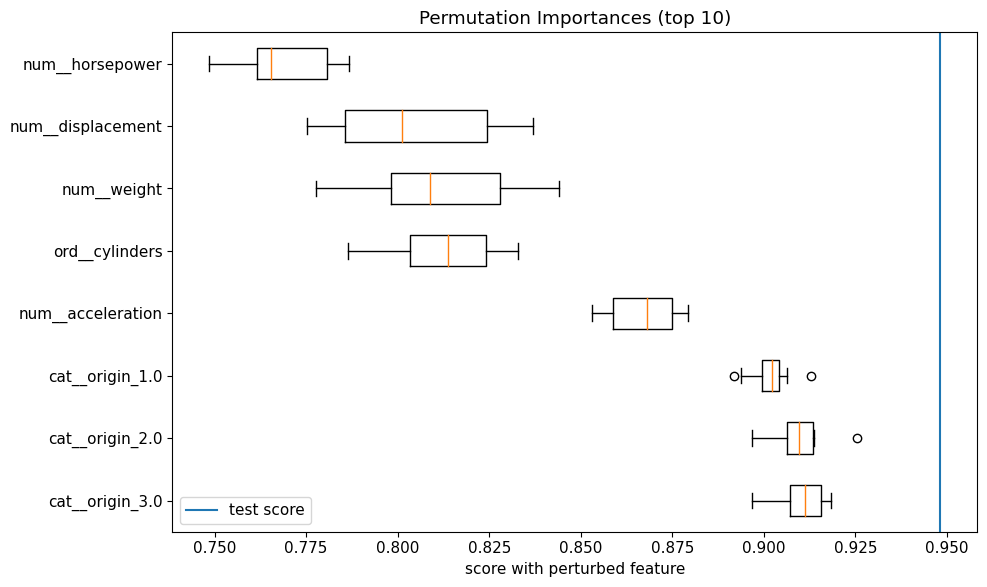

In [46]:
import matplotlib.pylab as plt

sorted_scores = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(scores[sorted_scores[-10:]].T,labels=ftrs[sorted_scores[-10:]],vert=False)
plt.axvline(beseline_r2,label='test score')
plt.title("Permutation Importances (top 10)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.savefig('Permutation_box.png', dpi=300)
plt.tight_layout()
plt.show()

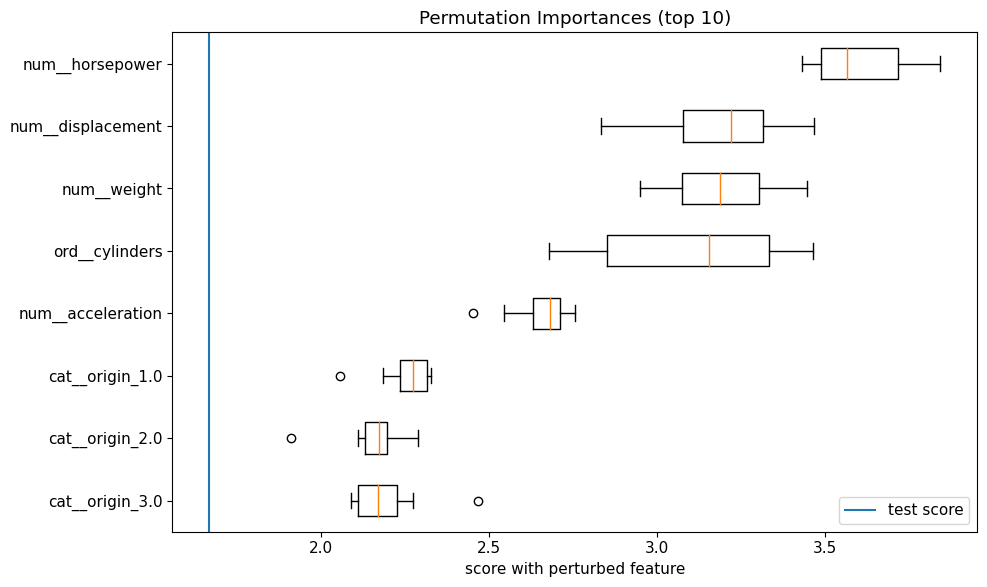

In [47]:
import matplotlib.pylab as plt

sorted_scores = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(scores_rmse[sorted_scores[-10:]].T,labels=ftrs[sorted_scores[-10:]],vert=False)
plt.axvline(baseline_rmse,label='test score')
plt.title("Permutation Importances (top 10)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

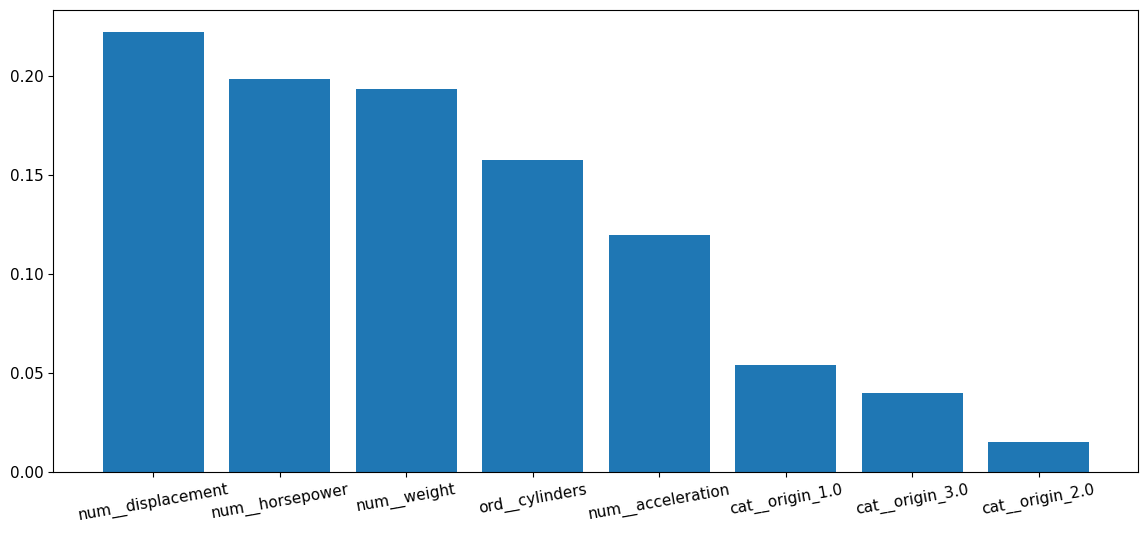

In [38]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_imp.columns
plt.figure(figsize=(14,6))
plt.bar(range(X_other.shape[1]), importances[indices])
plt.xticks(range(X_other.shape[1]), feature_names[indices], rotation=10)
plt.savefig('RF_feature_importance.png', dpi=300)
plt.show()

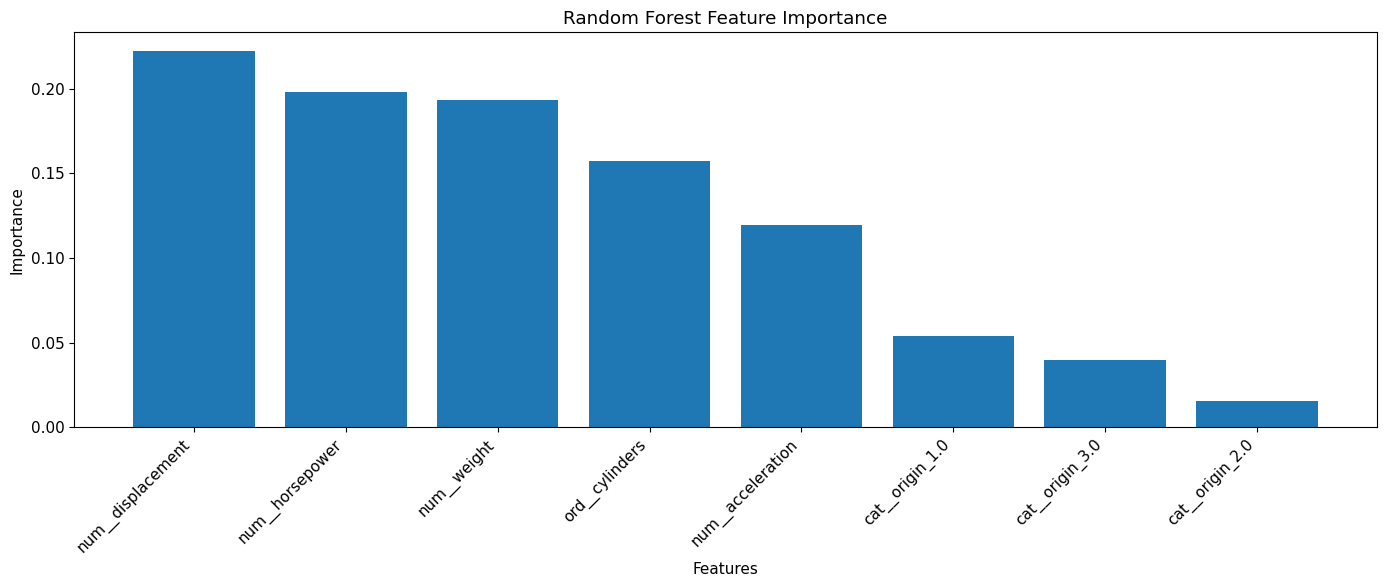

In [39]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_imp.columns

plt.figure(figsize=(14, 6))
plt.bar(range(X_imp.shape[1]), importances[indices])
plt.xticks(range(X_imp.shape[1]), feature_names[indices], rotation=45, ha='right')  # Rotate and adjust labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.savefig('RF_feature_importance.png', dpi=300)
plt.show()


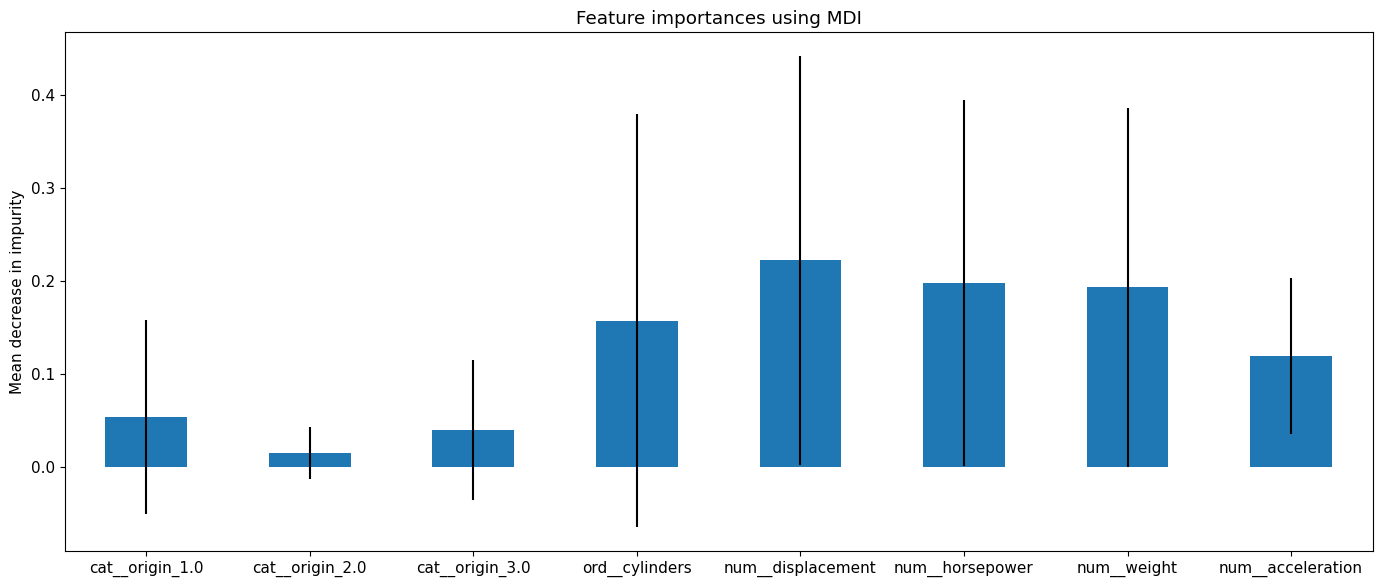

In [40]:
import time
forest = model_rf
importances = model_rf.feature_importances_
start_time = time.time()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize = (14,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.xticks(rotation = 0)
fig.tight_layout()
plt.savefig('RF_MDI.png', dpi=300)

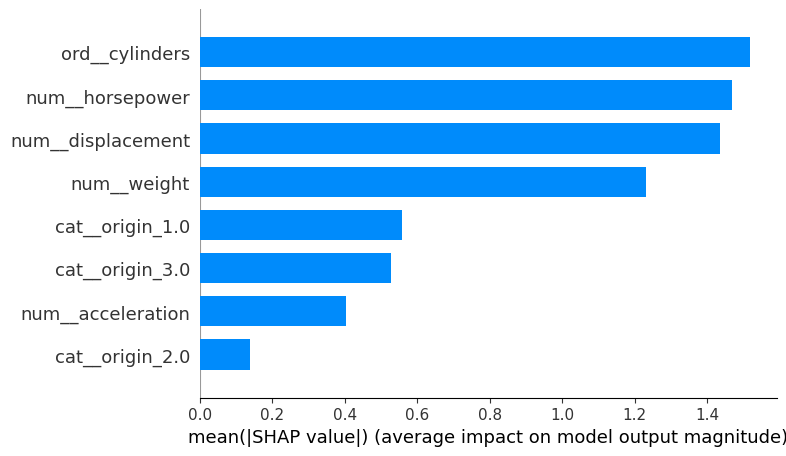

In [41]:


# Calculate SHAP values
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,feature_names = feature_names, plot_type='bar')

In [42]:
# pip install lime


In [43]:
# import lime
# from lime.lime_tabular import LimeTabularExplainer
# explainer = LimeTabularExplainer(X_other.values, feature_names=feature_names, mode='regression')
# instance_to_explain = X_test.iloc[5]
# explanation = explainer.explain_instance(instance_to_explain.values, model_rf.predict, num_features=len(feature_names))

# # Visualize the explanation
# explanation_fig = explanation.as_pyplot_figure()

# # Display the figure
# plt.show()

In [44]:

shap_values[:,5]

array([-1.88009083,  0.77758282, -1.59763288, -0.12501173, -0.63191352,
        2.11566572,  2.97731118,  0.16568019, -1.81446629, -0.01577398,
        2.48442233,  2.85354405,  0.65190236,  3.56023937, -1.28781741,
        1.26625621,  1.13830501,  0.29679936, -0.58252433,  1.88794701,
       -2.20772621,  0.80507503, -1.83915849, -1.81733962,  2.48769821,
       -0.81096304,  2.9445225 , -0.03259953,  1.4484397 , -0.75666667,
       -0.42839667, -0.85202613,  1.59749008,  1.75071819, -0.30348535,
       -1.2998947 ,  0.11440619, -2.38993089,  1.74740638, -2.51444857,
       -2.3608667 , -2.24679036,  1.32706433, -1.78775159, -1.36214914,
       -1.53978319,  0.19548338, -2.32916804, -0.33836933,  2.28971654,
        0.8915169 ,  1.06796708, -1.64298539,  0.77140337, -2.19215897,
       -3.10308891, -0.28683653,  0.37741825,  1.48500973, -0.97997007,
        1.85186711,  1.45119219, -0.78471558, -0.28826782, -2.36340888,
       -1.59488998, -2.3951547 , -0.58445683,  1.13210711, -2.33

In [45]:
# import shap
# shap.initjs() # required for visualizations later on


# matplotlib.rcParams.update({'font.size': 11})
# ftr = 'num_horsepower'
# indx = np.argwhere(feature_names==ftr)
# plt.figure(figsize=(5,3))
# plt.scatter(X_test[indx],shap_values[:,5])
# plt.ylabel('shap value')
# plt.xlabel(ftr)
# plt.show()

In [46]:
force_plot_1 = shap.force_plot(explainer.expected_value, shap_values[23, :], X_test.iloc[23, :], matplotlib = True, text_rotation = 30,show = False)

force_plot_1
plt.savefig('force_plot_23', dpi=350,bbox_inches = 'tight')

In [47]:
force_plot_10 = shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :], matplotlib = True, text_rotation = 30,show = False)

force_plot_10

plt.savefig('force_plot_10', dpi=350,bbox_inches = 'tight')

In [48]:
force_plot_20 = shap.force_plot(explainer.expected_value, shap_values[22, :], X_test.iloc[22, :], matplotlib = True, text_rotation = 30, show = False)

force_plot_20
plt.savefig('force_plot_22', dpi=350,bbox_inches = 'tight')